In [2]:
import math
import matplotlib.pyplot as plt

# Probability Problems for Developing Intuition

Probability theory is notoriously challenging field to develop an intuition for, but like all things it can be better understood by exploring scenarios where probability helps solve a real-world problem.

For each of these problems, do offer yourself some time to think through each problem before reading the solution. Some if not all will be hard to solve independently, but it is worth developing some intuition for what you *do* know, and what ideas you think *could* work, even if you do not yet have the specifics.

## The Birthday Problem

In a group of *N* people, what is the probability that at least two of them share the same birthday?
We denote this probability as $P(\text{match})$. The complementary probability — that **no one** shares a birthday — is $P(\text{no match})$, and clearly:

$$
P(\text{match}) = 1 - P(\text{no match}).
$$

It’s usually easier to calculate the complementary case first.

In the standard formulation of the birthday problem, we assume that birthdays are **independent** and **uniformly distributed** across the 365 days of the year, and that there are no instances of sampling bias, and that leap years aren't a thing...
In reality, this is only an approximation: real birth data show mild seasonal variation and weak correlations (for instance, between siblings).
However, these deviations are small enough that they do not meaningfully change the overall result.

If there are *N* people in the group and no one shares a birthday:

- The first person can have any of 365 birthdays.
- The second must have a different one - 364 options.
- The third must avoid the first two - 363 options.
- And so on...

Therefore, we have:

$$
P(\text{no match}) =
\frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \frac{362}{365} \times \dots \times \frac{365 - N + 1}{365},
$$

which we can express compactly using factorials as:

$$
\begin{align}
P(\text{no match})
&= \frac{365 \times 364 \times 363 \times \dots \times (365 - N + 1)}{365^N} \\
&= \frac{365!}{(365 - N)! \, 365^N}.
\end{align}
$$

Finally, the probability that **at least one** shared birthday occurs in the group is:

$$
P(\text{match}) = 1 - \frac{365!}{(365 - N)! \, 365^N}.
$$

Let's now graph this probability as a function of *N* to see how quickly it rises.


<function matplotlib.pyplot.show(close=None, block=None)>

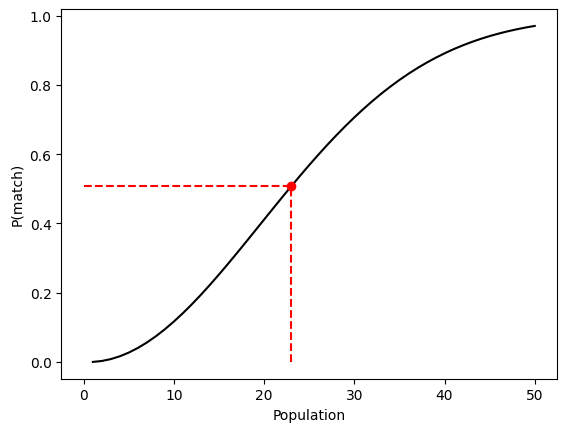

In [3]:
import math
from math import factorial as fac
import matplotlib.pyplot as plt

# Birthday problem figure.

fig = plt.Figure(figsize=(5,5))

def shared_birthday_probability(num_people: int) -> float:
    numerator = math.factorial(365)
    denominator = fac(365 - num_people) * 365**num_people
    return 1 - numerator / denominator

population = range(1, 51)

plt.plot(population,
         list(map(shared_birthday_probability, population)),
         color='k')
plt.plot(23, shared_birthday_probability(23),
         color='r', markersize=6, marker='o')
plt.hlines(y=[shared_birthday_probability(23)], xmin=0, xmax=23, linestyle='--', color='r')
plt.vlines(x=[23], ymin=0, ymax=0.5, linestyle='--',  color='r')
plt.xlabel("Population")
plt.ylabel("P(match)")

plt.show

## Finding a Particular Pokemon

You find yourself in the Sinnoh region, scouring for a particular Pokémon. You tell your accompanying friend that the probability of finding the Pokémon you seek per searching instance is $\frac{1}{n}$, to which they reply that, on average, you need only search $n$ times to find your quarry. Intuitively that sounds sensible, but is it true?

What is the probability of success based on her logic? The probability of finding the Pokémon on your first try is:

$$
P(\text{Pokémon}) = \frac{1}{n},
$$

so naturally the probability of not finding the Pokémon on the first attempt is:

$$
P(\text{No Pokémon}) = 1 - \frac{1}{n}.
$$

We presume to think that each searching instance is independent. Your previous efforts have no bearing on future success. Henceforth, the probability of failing to find the right Pokémon after $n$ attempts is:

$$
P(\text{No Pokémon after *n* tries}) = \left(1 - \frac{1}{n}\right)^n,
$$

meaning the probability of success on the $n^{th}$ attempt is merely 1 minus this probability:

$$
P(\text{Pokémon after *n* tries}) = 1 - \left(1 - \frac{1}{n}\right)^n.
$$

Let's now graph this probability equation as a function of *n*...

Text(0, 0.5, 'Probability of Success')

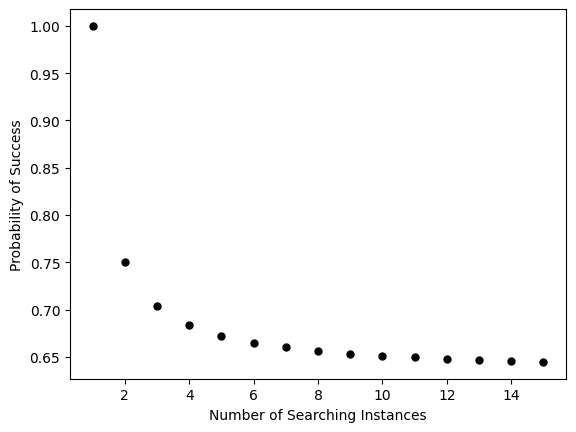

In [4]:
plt.Figure(figsize=(7,5))

trials = range(1, 16)

def prob_success_n_trials(n: int):
    p_fail = 1 - (1 / n)
    return 1 - p_fail**n

plt.plot(trials,
         list(map(prob_success_n_trials, trials)),
         linestyle='',
         marker='o',
         markersize=5,
         color='k')

plt.xlabel("Number of Searching Instances")
plt.ylabel("Probability of Success")

As $n$ gets larger, the probability of finding the Pokémon you're after steadily converges to a constant value of ~0.632. So to be certain you'll find your Pokémon you'll need to search more than *n* times. Although graphing it helps with intuition, we can discern a more accurate result by taking the limit of the probability function with respect to $n$:

$$
\lim_{n \to \infty} \left(1 - \left(1 - \frac{1}{n}\right)^n\right) = 1 - \frac{1}{e} = 0.632...
$$

This is the consequence of a special case where we have a probability of success as being one over the number of trials. We don't see this same convergence when the number of trials doesn't match the denominator. Let us consider flipping a coin 10 times, and managing to land 10 heads in a row. The probability of this happening is:

$$
P(\text{10 in a row}) = \frac{1}{2^{10}}= \frac{1}{1024}.
$$

So what is the probability of getting 10 in a row after 1024 tries? Bearing in mind that each trial is 10 coin flips...

$$
P(\text{10 in a row after 1024 tries}) = 1 - \left(1 - \frac{1}{1024}\right)^{1024} = 0.632 = 63.2\%,
$$

and if we were to try two thousand times?

$$
P(\text{10 in a row after 2000 tries}) = 1 - \left(1 - \frac{1}{1024}\right)^{2000} = 0.858 = 85.8\%.
$$

In summary, when the probability of success for an individual trial is $\frac{1}{n}$, the probability of success after $m$ tries is:

$$
P(\text{success after m tries}) = 1 - \left(1 - \frac{1}{n}\right)^m.
$$

## Identifying an outlying weight with a scale

You are provided with twelve balls, all of equal weight except for one which may be lighter or heavier than all of the others. You need to design an experiment to discern which ball is the odd one out, using the scale as few times as possible.

This problem has been discussed thoroughly on the internet before:

- https://www.youtube.com/watch?v=y5VdtQSqiAI&list=PLruBu5BI5n4aFpG32iMbdWoRVAA-Vcso6&index=2&ab_channel=JakobFoerster

- https://www.youtube.com/watch?v=v68zYyaEmEA&t=1521s&ab_channel=3Blue1Brown

Nonetheless we offer an explanation here as well... we approach this challenge through the idea of entropy; how much information do we need to solve the problem? Or in other words, how much uncertainty is there about the system initially?

Well, there are twelve balls, and initially that's all we know. All twelve balls are equally likely to be the imposter

## Should you gamble at the casino? (Roulette wheel)

Generally inadvisable, unless declaring bankruptcy is the objective.

[[Roulette wheel figure stock image]]

On a roulette wheel, there are 36 segments which can be bet on, along with the zero segment, meaning there are 37 possible outcomes. There are equally many red tiles as there are black, so the probability of landing on either colour is $\frac{18}{37}$. Note that in the American version of the game, there is a second zero tile labelled '00', making the American version of Roulette a worse proposition financially than the European game.

To play, you must pay an entry fee (£1 here) and select a colour. If your colour comes up, your bet is returned to you along with an additional £1. This begs the question, *on average*, how much money do you expect to win from your £1? We can calculate the expected return as follows:

$$
\begin{align}
\langle £ \rangle
&= \sum_{outcomes} \text{probability of outcome} \times \text{return from corresponding outcome} \\
&= \left(\frac{18}{37} \times £2 \right) \times \left(\frac{18}{37} \times £0 \right) = 0.973 = £0.97
\end{align}
$$

This means that *on average*, you lose £0.03 for every £1 you bet. Were you to play only once, you have a $\frac{18}{37} = 48.6\%$ chance of winning, and there's a $\frac{19}{37} = 51.4\%$ chance of the casino winning. This is an example of a Binomial distribution (success/failure); recall that we define a Binomial distribution by:

- The probability of success, $p$.
- The number of trials undergone, $n$.
- The number of successes amongst these trials, $k$.

$$
P(\text{win}) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
$$

Starting with the simplest case, $n=k=1$, $P(\text{win}) = \frac{18}{37}$:

$$
P(\text{win}) = \frac{1!}{1!(1-1)!} \left( \frac{18}{37} \right)^1 \left( 1 - \frac{18}{37} \right)^{1-1} = \frac{18}{37},
$$

which is as you'd expect, thankfully. As we'll need these metrics going forward, recall the formulae for the mean and standard deviation of a Binomial Distribution:

$$
\mu = np,
$$

$$
\sigma = \sqrt{np(1-p)}.
$$

Let us now make an unwise decision and play Roulette 1000 times... Our condition for success here is that we win more often than we lose, i.e. we have a target of $k = 501$. How likely are we to achieve this goal?

In [70]:
def binomial(num_trials: int, probability: float) -> list:
    trials = range(1, num_trials + 1)
    probabilities = []

    for trial in trials:
        combination = math.comb(num_trials, trial)
        trial_probability = probability**trial * (1 - probability)**(num_trials - trial)
        probabilities.append(combination * trial_probability)

    return probabilities

victory = 501
trials = 1000
probabilities = binomial(num_trials=trials, probability=(18/37))
mean = trials * (18/37)

fig = plt.Figure(figsize=(5,5))
plt.plot(range(1, 1001),
         probabilities,
         color='k')

plt.xlim(350, 650)
plt.vlines(x=victory, ymin=0, ymax=0.025, color='k', linestyle='--', linewidth=1.5)

# Filling the win/loss regions.
plt.fill_between(x=range(1, victory), y1=probabilities[0:victory-1], color='deepskyblue', alpha=0.3)
plt.fill_between(x=range(victory, trials+1), y1=probabilities[victory-1:trials], color='red', alpha=0.3)

# Drawing arrows to indicate the win/loss regions.
plt.arrow(x=victory, y=0.020, dx=30, dy=0,
          width=0.0003,
          length_includes_head=True,
          head_width=0.0006,
          head_length=10,
          color='k')

plt.arrow(x=victory, y=0.020, dx=-30, dy=0,
          width=0.0003,
          length_includes_head=True,
          head_width=0.0006,
          head_length=10,
          color='k')

# Text denoting win/loss region.
plt.figtext(x=550, y=0.020, s="Win \n Condition", color='r')

plt.xlabel("Number of Roulette Wheel Wins")
plt.ylabel("Probability of k wins")
plt.show()